# Algorithm to solve the Shortest Path Problem with Time Windows

General idea:

Guided by the lower and upper bound of the problem instance, perform depth-first searches until time runs out (not implemented), the optimal solution is found or all valid solutions are calculated.

In [68]:
import random
from graphviz import Digraph
import pandas as pd
from IPython.display import display
random.seed()
import copy

In [8]:
class Node:
    def __init__(self, index, window_left, window_right):
        self.window_left = window_left
        self.window_right = window_right
        self.visited = False
        self.index = index    


In [102]:
def show_graph(graph, nodes):
    g=Digraph('G')
    g.node_attr.update(shape='circle')
    g.attr(rankdir='LR')
    for x in range(len(graph[0])):
        node = get_node(nodes, x)
        if(node.window_left !=None):
            label = str(x) + " \n["+str(node.window_left)+","+str(node.window_right)+"] "
        else:
            label = str(x)
        g.node(str(x),label=label, fontsize='8', fixedsize='true')
        for y in range(len(graph[0])):
            if(x != y):
                value = graph[x][y]
                if(value!=None):
                    g.edge(str(x),str(y),label=str(value))
    return display(g)

def show_solution(graph, solution):
    g=Digraph('H')
    g.node_attr.update(shape='circle')
    g.attr(rankdir='LR')
    for x in range(len(graph[0])):
        node = get_node(nodes, x)
        if(node.window_left !=None):
            label = str(x) + " \n["+str(node.window_left)+","+str(node.window_right)+"] "
        else:
            label = str(x)
        g.node(str(x),label=label, fontsize='8', fixedsize='true')
        for y in range(len(graph[0])):
            if(x != y):
                value = graph[x][y]
                if(value!=None):
                    if(contains_edge(solution,x,y)):
                        g.edge(str(x),str(y),label=str(value), color='red')
                    else:
                        g.edge(str(x),str(y),label=str(value))                        
    return display(g)

def contains_edge(solution, source, target):
    previous = solution[0]
    #print(solution)
    #print("contains %d -> %d? " % (source, target))
    for node in solution:
        if(node!=solution and previous==source and node == target):
            #print("yes")
            return True
        previous = node
    #print("no")
    return False

def generate_complete_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            if(x == y):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph
        
def generate_random_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            edge_exists = random.randint(1,3)
            if(x == y or edge_exists != 1):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph

def generate_random_directed_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices*2):
        source = random.randint(0, nr_vertices-1)
        target = source
        while(target == source):
            target = random.randint(0, nr_vertices-1)
        #print("source=%d target= %d" % (source, target))
        weight = random.randint(1,max_weight)
        graph[source][target] = weight
    return graph


def get_node(nodes, node_index):
    for node in nodes:
        if(node.index == node_index):
            return node

def get_next_node(nodes):
    min = float('inf')
    min_node = None
    for node in nodes:
        if(not node.visited and node.distance < min):
            min = node.distance
            min_node = node
    return min_node

In [7]:
nr_vertices = 6
graph = generate_random_directed_graph(nr_vertices, 25)
#show_graph(graph)

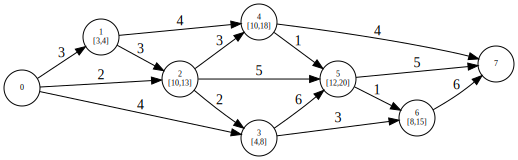

In [70]:
graph = [
    [None,3,2,4,None,None,None,None],
    [None,None,3,None,4,None,None,None],
    [None,None,None,2,3,5,None,None],
    [None,None,None,None,None,6,3,None],
    [None,None,None,None,None,1,None,4],
    [None,None,None,None,None,None,1,5],
    [None,None,None,None,None,None,None,6],
    [None,None,None,None,None,None,None,None]
]
nodes = []
nodes.append(Node(0, None, None))
nodes.append(Node(1, 3, 4))
nodes.append(Node(2, 10,13))
nodes.append(Node(3, 4,8))
nodes.append(Node(4, 10,18))
nodes.append(Node(5, 12,20))
nodes.append(Node(6, 8,15))
nodes.append(Node(7, None, None))

show_graph(graph, nodes)

Lower bound: 14  | Upper bound: 25
Current node: 0, current cost: 0  current path: [0]
Updating cost. Current cost: 0. Next node: 1  New cost: 3 Found: False
Current node: 1, current cost: 3  current path: [0, 1]
Updating cost. Current cost: 3. Next node: 2  New cost: 6 Found: False
Current node: 2, current cost: 10  current path: [0, 1, 2]
Updating cost. Current cost: 10. Next node: 4  New cost: 13 Found: False
Current node: 4, current cost: 13  current path: [0, 1, 2, 4]
Updating cost. Current cost: 13. Next node: 5  New cost: 14 Found: False
Current node: 5, current cost: 14  current path: [0, 1, 2, 4, 5]
Updating cost. Current cost: 14. Next node: 6  New cost: 15 Found: False
Current node: 6, current cost: 15  current path: [0, 1, 2, 4, 5, 6]
Updating cost. Current cost: 15. Next node: 7  New cost: 21 Found: False
Current node: 7, current cost: 21  current path: [0, 1, 2, 4, 5, 6, 7]
Updating cost. Current cost: 14. Next node: 7  New cost: 19 Found: False
Current node: 7, current c

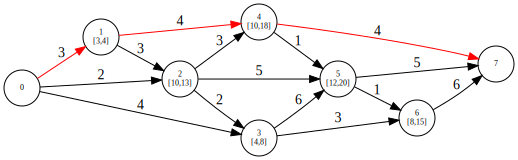

[[[0, 1, 2, 4, 5, 6, 7], 21],
 [[0, 1, 2, 4, 5, 7], 19],
 [[0, 1, 2, 4, 7], 17],
 [[0, 1, 2, 5, 7], 20],
 [[0, 1, 4, 5, 6, 7], 19],
 [[0, 1, 4, 5, 7], 17],
 [[0, 1, 4, 7], 14]]

In [119]:
def find_bounds(graph, nodes, target):
    target_node = get_node(nodes, target)
    if(target_node != None):
        target_neighbors = []
        lower_bound = float('inf')
        upper_bound = float('-inf')
        for x in range(len(graph[0])):
            if(graph[x][target] != None):
                neighbor_node = get_node(nodes, x)
                lower_cost = graph[x][target] + neighbor_node.window_left
                upper_cost = graph[x][target] + neighbor_node.window_right
                if(lower_cost < lower_bound):
                    lower_bound = lower_cost
                if(upper_cost > upper_bound):
                    upper_bound = upper_cost
        print("Lower bound: %d  | Upper bound: %d" % (lower_bound, upper_bound))
        return lower_bound, upper_bound

def get_random_valid_neighbor(current, graph, nodes, current_cost, path):
    valid_neighbors = []
    for neighbor in range(len(graph[0])):
        if(graph[current][neighbor] !=None):
            neighbor_node = get_node(nodes, neighbor)
            if(neighbor not in path):
                if(neighbor_node.window_right == None or current_cost < neighbor_node.window_right):
                    valid_neighbors.append(neighbor)
    #print(valid_neighbors)
    return valid_neighbors

    
def depth_search(current, target, path, cost, lower_bound, upper_bound, found):
    if(cost < upper_bound and not found):
        path.append(current)
        current_node = get_node(nodes, current)
        if(current_node.window_left != None and cost < current_node.window_left):
            cost = cost + (current_node.window_left - cost)
        print("Current node: %d, current cost: %d  current path: %s" % (current, cost, path))
        if(current == target):
            entry = [path, cost]
            paths.append(entry)
            if(cost == lower_bound):
                print("found min "+str(cost))
                return True
            return found
        next_nodes = get_random_valid_neighbor(current, graph, nodes, cost, path)
        for next_node in next_nodes:
            if(next_node != None and not found):
                print("Updating cost. Current cost: %d. Next node: %d  New cost: %d Found: %s" % (cost, next_node, cost+graph[current][next_node], found))
                new_cost = cost + graph[current][next_node]
                found = depth_search(next_node, target, copy.copy(path), copy.copy(new_cost), lower_bound, upper_bound, found)
    return found
                    

def examine_paths():
    for path in paths:
        cost = 0
        previous = path[0]
        for node in path:
            if(node != previous):
                #print("%d to %d" % (previous, node))
                cost += graph[previous][node]
            previous = node
        print("Path: %s  - Cost: %d" % (path, cost))
        
def print_min_path():
    min_path = []
    min_path_cost = float('inf')
    for path in paths:
        cost = path[1]
        if(cost < min_path_cost):
            min_path = path[0]
            min_path_cost = cost
    print("Minimum path found: %s   | Cost: %d" % (min_path, min_path_cost))
    show_solution(graph, min_path)
        
paths = []
def search():
    paths = []
    target = 7
    lower_bound, upper_bound = find_bounds(graph, nodes, target)
    depth_search(0,target, [], 0, lower_bound, upper_bound, False)
    print_min_path()
    
search()
paths